In [ ]:
import numpy as np
import pandas as pd
import ast
from keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import OneHotEncoder


df = pd.read_csv("encoded_sequences.csv")

# Filter sequences with length greater than 75
df = df[df['sequence'].apply(len) <= 20]
print(df)
df.shape
# Convert string representation of lists into actual lists
df['sequence'] = df['sequence'].apply(ast.literal_eval)

# Find the maximum sequence length
max_sequence_length = df['sequence'].apply(len).max()

print("Maximum sequence length:", max_sequence_length)


# Pad sequences to max sequence length
sequences = df['sequence'].tolist()
padded_sequences = pad_sequences(sequences, padding='post')
seq_length  = padded_sequences.shape[1]
print(seq_length)

       caseid                                           sequence
3      173697                                         [10, 7, 5]
4      173700                                         [10, 7, 5]
5      173703                  [10, 7, 8, 20, 20, 20, 20, 4, 20]
6      173706  [10, 7, 18, 18, 8, 20, 18, 20, 20, 20, 20, 20,...
7      173709      [10, 7, 8, 20, 20, 20, 20, 20, 20, 20, 20, 4]
...       ...                                                ...
13077  214349                             [10, 7, 18, 18, 5, 18]
13080  214358  [10, 7, 8, 20, 20, 20, 20, 1, 15, 6, 13, 16, 2...
13083  214367                                         [10, 7, 5]
13084  214370                             [10, 7, 18, 18, 5, 18]
13086  214376                             [10, 7, 18, 18, 5, 18]

[7185 rows x 2 columns]
Maximum sequence length: 16
16


In [ ]:
# Flatten all sequences to identify unique events
all_events = [event for seq in df['sequence'] for event in seq]

# Convert to set to get unique events
unique_events = set(all_events)

# Number of unique events
num_events = len(unique_events)

print("Number of unique events:", num_events)


Number of unique events: 23


In [ ]:
import numpy as np
import pandas as pd
import ast
from keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import OneHotEncoder

# Load the data
df = pd.read_csv("encoded_sequences.csv")

# Convert string representation of lists into actual lists
df['sequence'] = df['sequence'].apply(ast.literal_eval)

# Filter sequences with length greater than 75
df = df[df['sequence'].apply(len) <= 25]

# Find the maximum sequence length
max_sequence_length = df['sequence'].apply(len).max()
print("Maximum sequence length:", max_sequence_length)

# Pad sequences to max sequence length
sequences = df['sequence'].tolist()
padded_sequences = pad_sequences(sequences, padding='post', maxlen=max_sequence_length)
seq_length = padded_sequences.shape[1]
print(seq_length)


Maximum sequence length: 25
25


In [ ]:
# Flatten the list of sequences
flattened_sequences = [event for seq in sequences for event in seq]

# Get unique events
unique_events = set(flattened_sequences)

print("Unique events:", unique_events)
print("Number of unique events:", len(unique_events))


Unique events: {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23}
Number of unique events: 23


In [ ]:
print("Unique values in padded_sequences:", np.unique(padded_sequences))
print("Number of events:", num_events)
print(seq_length)

Unique values in padded_sequences: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
Number of events: 23
25


In [ ]:
from keras.layers import Flatten, Dense, Input, LeakyReLU, Dropout, LayerNormalization
from keras.models import Sequential, Model

In [1]:
def penalized_loss(y_true, y_pred):
    """
    This loss function computes the binary crossentropy and adds a penalty
    if there's a zero (padding) value in between the sequence.
    """

    # Standard binary crossentropy
    bce = tf.keras.losses.binary_crossentropy(y_true, y_pred)

    # Compute the penalty
    # Here, we're checking for sequences where a non-zero value follows a zero value.
    zero_followed_by_nonzero = tf.logical_and(y_pred[:, :-1] == 0, y_pred[:, 1:] != 0)

    # Introduce a penalty term. This value can be tuned based on how strong you want the penalty to be.
    penalty = tf.reduce_sum(tf.cast(zero_followed_by_nonzero, tf.float32)) * 10.0

    return bce + penalty


In [55]:
import numpy as np
import pandas as pd
import ast
from keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import OneHotEncoder

# Load the DataFrame from the CSV file
df = pd.read_csv("encoded_sequences.csv")

# Convert the 'sequence' column from string to list
df['sequence'] = df['sequence'].apply(ast.literal_eval)

# Filter rows where the sequence length is between 4 and 25
df = df[df['sequence'].apply(len).between(4, 25)]

# Calculate the maximum sequence length
max_sequence_length = df['sequence'].apply(len).max()
print("Maximum sequence length:", max_sequence_length)

# Convert sequences to a list
sequences = df['sequence'].tolist()

# Pad sequences to a common length
padded_sequences = pad_sequences(sequences, padding='post', maxlen=max_sequence_length)

# Get the sequence length after padding
seq_length = padded_sequences.shape[1]
print("Sequence length after padding:", seq_length)

# Flatten sequences to get unique events
flattened_sequences = [event for seq in sequences for event in seq]

# Get unique events
unique_events = set(flattened_sequences)

print("Unique events:", unique_events)
print("Number of unique events:", len(unique_events))


Maximum sequence length: 25
Sequence length after padding: 25
Unique events: {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23}
Number of unique events: 23


In [56]:
from collections import Counter

# Flatten the sequences to tuples to make them hashable for counting
flattened_sequences1 = [tuple(seq) for seq in padded_sequences]

# Use Counter to count unique sequences
sequence_counts = Counter(flattened_sequences1)

# Print unique sequences and their counts
for seq, count in sequence_counts.items():
    print(f"Sequence: {list(seq)}, Count: {count}")

Sequence: [10, 7, 8, 20, 20, 20, 20, 4, 20, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], Count: 87
Sequence: [10, 7, 18, 18, 8, 20, 18, 20, 20, 20, 20, 20, 5, 20, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], Count: 74
Sequence: [10, 7, 8, 20, 20, 20, 20, 20, 20, 20, 20, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], Count: 13
Sequence: [10, 7, 18, 18, 8, 20, 18, 20, 20, 20, 20, 20, 4, 20, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], Count: 21
Sequence: [10, 7, 8, 20, 20, 20, 20, 1, 15, 6, 13, 16, 22, 20, 22, 22, 22, 17, 23, 22, 23, 5, 14, 23, 0], Count: 6
Sequence: [10, 7, 18, 18, 18, 18, 8, 20, 18, 20, 20, 20, 20, 20, 20, 20, 20, 20, 5, 20, 0, 0, 0, 0, 0], Count: 7
Sequence: [10, 7, 18, 18, 5, 18, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], Count: 1872
Sequence: [10, 7, 18, 18, 8, 20, 18, 20, 1, 15, 6, 13, 16, 22, 20, 22, 12, 4, 22, 0, 0, 0, 0, 0, 0], Count: 7
Sequence: [10, 7, 8, 20, 20, 20, 20, 1, 6, 15, 13, 16, 22, 20, 22, 17, 23, 22, 23, 11, 9, 2, 3, 23, 0], Count: 1
Sequence: [10, 7, 8, 

In [57]:
import numpy as np
from tensorflow.keras.layers import Input, Dense, LSTM, Flatten, Reshape, BatchNormalization, LeakyReLU, LayerNormalization, Dropout
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
import tensorflow as tf

# Global Variables
num_events = len(unique_events)
seq_length = seq_length
num_events = np.max(padded_sequences) + 1

def build_generator():
    """
    Constructs the generator model using LSTM layers.
    """
    model = Sequential()

    model.add(Dense(256, input_dim=100))
    model.add(LeakyReLU(alpha=0.2))
    model.add(LayerNormalization())
    model.add(Dropout(0.4))

    model.add(Reshape((1, 256)))
    model.add(LSTM(512, return_sequences=True))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dropout(0.4))

    model.add(LSTM(seq_length))
    model.add(Dense(seq_length * num_events, activation='linear'))
    model.add(Reshape((seq_length, num_events)))

    noise = Input(shape=(100,))
    seq = model(noise)

    return Model(noise, seq)

def build_discriminator():
    """
    Constructs the discriminator model using Dense layers.
    """
    model = Sequential()

    model.add(Flatten())

    model.add(Dense(512))
    model.add(LeakyReLU(alpha=0.2))
    model.add(LayerNormalization())
    model.add(Dropout(0.4))

    model.add(Dense(256))
    model.add(LeakyReLU(alpha=0.2))
    model.add(LayerNormalization())
    model.add(Dropout(0.4))

    model.add(Dense(1, activation='sigmoid'))

    seq = Input(shape=(seq_length, num_events))
    validity = model(seq)

    return Model(seq, validity)

def compute_reward(sequence):
    """
    Computes the reward for a sequence. It rewards sequences where zeros only appear at the end and penalizes sequences with zeros in the middle.
    """
    # Find the index of the first zero
    first_zero_index = len(sequence)
    for i, value in enumerate(sequence):
        if value == 0:
            first_zero_index = i
            break

    # Calculate reward
    reward = 0
    # Check if there are any non-zero elements after the first zero
    if any(value != 0 for value in sequence[first_zero_index:]):
        reward -= 90  # Penalize for zeros in the middle
    else:
        reward += 10  # Reward for zeros only at the end

    return reward

# Build and compile the discriminator
discriminator = build_discriminator()
discriminator.compile(loss='binary_crossentropy', optimizer=Adam(0.0001, 0.5), metrics=['accuracy'])

# Build the generator
generator = build_generator()

# Generator takes noise as input and generates sequences
z = Input(shape=(100,))
seq = generator(z)

# For the combined model, only train the generator
discriminator.trainable = False

# Discriminator takes generated sequences as input and determines validity
validity = discriminator(seq)

# The combined model (GAN)
gan = Model(z, validity)
gan.compile(loss='binary_crossentropy', optimizer=Adam(0.0002, 0.5))

def non_zero_loss(num_non_zeros):
    def loss(y_true, y_pred):
        non_zeros = tf.math.count_nonzero(tf.argmax(y_pred, axis=-1), axis=-1)
        return tf.math.abs(tf.cast(non_zeros, tf.float32) - num_non_zeros)
    return loss

def train(epochs, batch_size, sample_interval):
    """
    Trains the GAN model.
    """
    real_seqs_one_hot = to_categorical(padded_sequences, num_classes=num_events)
    valid = np.ones((batch_size, 1))
    fake = np.zeros((batch_size, 1))
    avg_non_zeros = np.mean([np.count_nonzero(seq) for seq in padded_sequences])
    generator.compile(loss=non_zero_loss(avg_non_zeros), optimizer=Adam(0.0001, 0.5))

    for epoch in range(epochs):
        idx = np.random.randint(0, real_seqs_one_hot.shape[0], batch_size)
        real_seqs = real_seqs_one_hot[idx]

        noise = np.random.normal(0, 1, (batch_size, 100))
        gen_seqs = generator.predict(noise)

        gen_seqs_argmax = np.argmax(gen_seqs, axis=-1)

        d_loss_real = discriminator.train_on_batch(real_seqs, valid)
        d_loss_fake = discriminator.train_on_batch(gen_seqs, fake)
        d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

         # Enhance the penalty for zeros in between
        rewards = np.array([compute_reward(seq) for seq in gen_seqs_argmax])
        aggregated_rewards = np.mean(rewards, axis=-1).reshape(-1, 1)

        noise = np.random.normal(0, 1, (batch_size, 100))
        g_loss = gan.train_on_batch(noise, valid-aggregated_rewards)

        if epoch % sample_interval == 0:

            validate_sequences(generator,padded_sequences, batch_size)

def validate_sequences(generator,real_data, batch_size):
    noise = np.random.normal(0, 1, (batch_size, 100))
    gen_seqs = generator.predict(noise)
    gen_seqs_argmax = np.argmax(gen_seqs, axis=-1)

    # Select random real data sequences for comparison
    real_indices = np.random.choice(range(len(real_data)), batch_size, replace=False)
    real_samples = [real_data[idx] for idx in real_indices]

    # Display both real and synthetic sequences
    for i, seq in enumerate(gen_seqs_argmax):
        print(f"Synthetic sequence {i+1}: {seq}")
        print(f"Real sequence {i+1}: {real_samples[i]}\n")


train(epochs=1000, batch_size=128, sample_interval=100)

Streaming output truncated to the last 5000 lines.
  0]
Real sequence 38: [10  7 18 18  5 18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0]

Synthetic sequence 39: [10  7  1 11 20 18 22 20 15 23  1 20  1 16 23 14 12 21 15  1  0  0 18  0
  0]
Real sequence 39: [10  7 18 18  8 20 18 20 20 20 20 20  5 20  0  0  0  0  0  0  0  0  0  0
  0]

Synthetic sequence 40: [ 2 17 18 20  5 23  9  3  9  0 18 20  7 21 16 22  4 20  5 18  9 14  7  4
 18]
Real sequence 40: [10  7 18 18 18 18  5 18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0]

Synthetic sequence 41: [10  7  4 20 20 12  9 20 18 14 12 20  2 11  5  9 10  0 10 14 23  4 23  8
  0]
Real sequence 41: [10  7 18 18  5 18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0]

Synthetic sequence 42: [10  7  7  2  8 20 18 23 12  6  8 22  0  6 12  8  4 10  9 17  0  0 11  0
  0]
Real sequence 42: [10  7 18 18 18 18  5 18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0]

Synthetic sequence 43: [10  7  8  2  8 20  6 20 16  4 1

In [58]:
def compare_real_and_synthetic(generator, real_data, num_samples=10):
    # Generate a batch of random noise for multiple samples
    noise = np.random.normal(0, 1, (num_samples, 100))
    gen_seqs1 = generator.predict(noise)
    gen_seqs_argmax1 = np.argmax(gen_seqs1, axis=-1)

    def move_zeros_to_end(sequence):
        non_zero_elements = [elem for elem in sequence if elem != 0]
        zero_elements = [0] * (len(sequence) - len(non_zero_elements))
        return non_zero_elements + zero_elements

    # Display synthetic sequences alongside different real sequences
    for i in range(num_samples):
        real_index = np.random.choice(len(real_data))  # Randomly select a real sequence
        real_sample = real_data[real_index]
        synthetic_sample1 = gen_seqs_argmax1[i]

        # Move zeros to the end of sequences
        real_sample = move_zeros_to_end(real_sample)
        synthetic_sample1 = move_zeros_to_end(synthetic_sample1)

        print(f"Real sequence {i + 1}: {real_sample}")
        print(f"Synthetic sequence {i + 1}: {synthetic_sample1}\n")

# Assuming your GAN model is trained and 'generator' is your trained generator model
# And 'padded_sequences' is your real data

compare_real_and_synthetic(generator, padded_sequences, num_samples=200)


# Assuming your GAN model is trained and 'generator' is your trained generator model
# And 'padded_sequences' is your real data
def move_zeros_to_end(sequence):
    non_zero_elements = [elem for elem in sequence if elem != 0]
    zero_elements = [0] * (len(sequence) - len(non_zero_elements))
    return non_zero_elements + zero_elements





7/7 [==============================] - 1s 9ms/step
Real sequence 1: [10, 7, 18, 18, 5, 18, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Synthetic sequence 1: [10, 7, 8, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 17, 1, 9, 0, 0, 0, 0, 0]

Real sequence 2: [10, 7, 18, 18, 8, 20, 18, 20, 20, 20, 20, 20, 20, 20, 20, 20, 5, 20, 0, 0, 0, 0, 0, 0, 0]
Synthetic sequence 2: [10, 7, 8, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 4, 0, 0, 0, 0, 0, 0, 0]

Real sequence 3: [10, 7, 18, 18, 5, 18, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Synthetic sequence 3: [10, 7, 18, 20, 18, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 0, 0, 0, 0, 0, 0, 0, 0, 0]

Real sequence 4: [10, 7, 18, 18, 8, 20, 18, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20]
Synthetic sequence 4: [10, 20, 8, 20, 20, 20, 20, 19, 13, 11, 13, 1, 22, 16, 22, 15, 20, 17, 16, 12, 9, 11, 6, 21, 0]

Real sequence 5: [10, 7, 18, 18, 8, 20, 18, 20, 20, 20, 1, 6, 15, 13,

1/1 [==============================] - 0s 53ms/step
0.12837163464344242
0.46153846153846156
1/1 [==============================] - 0s 46ms/step
0.371693959565626
0.7142857142857143
1/1 [==============================] - 0s 59ms/step
1.2333641570279088
0.8
1/1 [==============================] - 0s 77ms/step
inf
0.38461538461538464
1/1 [==============================] - 0s 93ms/step
inf
0.36363636363636365
1/1 [==============================] - 0s 63ms/step
0.8388565838575563
0.8
1/1 [==============================] - 0s 61ms/step
0.19496714545421212
0.7142857142857143
1/1 [==============================] - 0s 91ms/step
0.7964115932219791
0.7142857142857143
1/1 [==============================] - 0s 55ms/step
1.2338846532791377
0.8
1/1 [==============================] - 0s 77ms/step
0.9427701400499935
0.8333333333333334
1/1 [==============================] - 0s 95ms/step
0.5037928521366989
0.7692307692307693
1/1 [==============================] - 0s 63ms/step
inf
0.36363636363636365
1/1 [

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


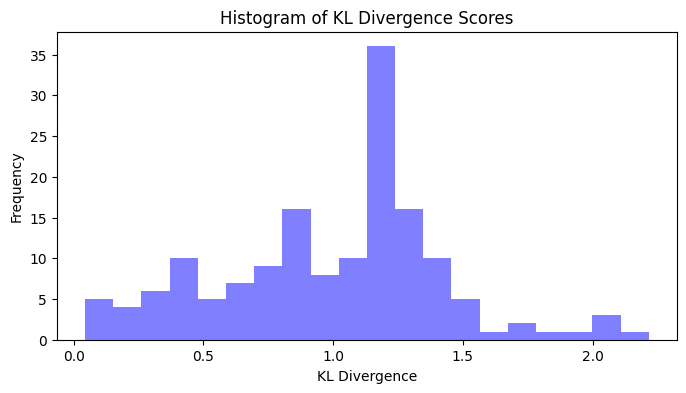

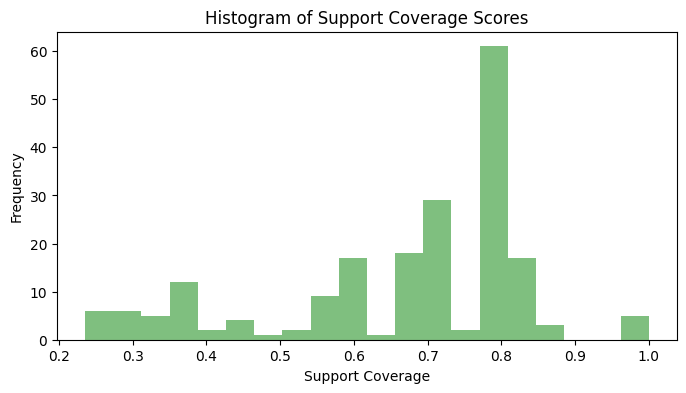

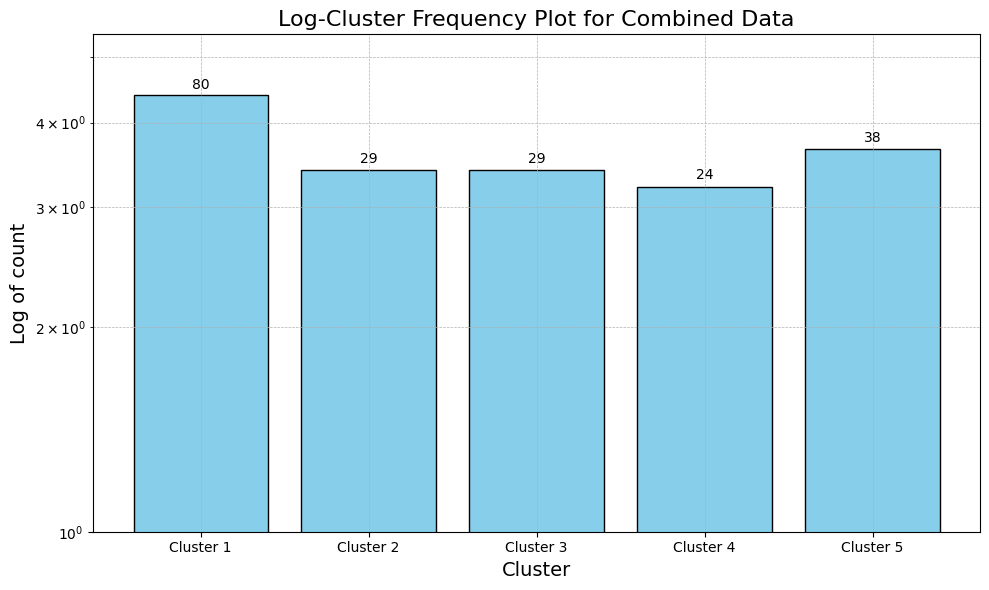

In [109]:
import numpy as np
from scipy.stats import entropy
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
# Generate real and synthetic sequences
num_samples = 20

def real_sync_generation(generator, real_data, num_samples=10):
    # Generate a batch of random noise for multiple samples
    noise = np.random.normal(0, 1, (num_samples, 100))
    gen_seqs1 = generator.predict(noise)
    gen_seqs_argmax1 = np.argmax(gen_seqs1, axis=-1)

    def kl_divergence(real_data, synthetic_data):
        return entropy(real_data, synthetic_data)

    def support_coverage(real_data, synthetic_data):
        unique_real = set(real_data)
        unique_synthetic = set(synthetic_data)
        common_support = len(unique_real.intersection(unique_synthetic))
        return common_support / len(unique_real)

    # Generate example real and synthetic datasets (replace with your data)
    kl_scores = []
    coverage_value = []
    combined_data = []
    for i in range(num_samples):
        real_index = np.random.choice(len(padded_sequences))
        real_sequence = padded_sequences[real_index]

        noise = np.random.normal(0, 1, (1, 100))
        synthetic_sequence = generator.predict(noise)
        synthetic_sequence = np.argmax(synthetic_sequence[0], axis=-1)

        real_sequence = move_zeros_to_end(real_sequence)
        synthetic_sequence = move_zeros_to_end(synthetic_sequence)

        # Calculate KL Divergence manually
        kl_score = kl_divergence(real_sequence, synthetic_sequence)
        print(kl_score)
        kl_scores.append(kl_score)

        # Calculate Support Coverage
        coverage = support_coverage(real_sequence, synthetic_sequence)
        print(coverage)
        coverage_value.append(coverage)

        combined_data.append(np.concatenate((real_sequence, synthetic_sequence)))

    # Filter out non-finite values from kl_scores
    kl_scores = [score for score in kl_scores if np.isfinite(score)]

    # Perform clustering
    num_clusters = 5  # Choose an appropriate number of clusters
    kmeans = KMeans(n_clusters=num_clusters, random_state=0)
    cluster_labels = kmeans.fit_predict(combined_data)
    cluster_counts = np.bincount(cluster_labels, minlength=num_clusters)
    cluster_counts[cluster_counts == 0] = 1

    centroids = kmeans.cluster_centers_

# Now let's print out the centroids to understand what each cluster represents
    for i, centroid in enumerate(centroids):
      print(f"Cluster {i+1} centroid: {centroid}")

    print(kl_scores)
    print(coverage_value)
    # Create histograms for KL Divergence scores
    plt.figure(figsize=(8, 4))
    plt.hist(kl_scores, bins=20, alpha=0.5, color='blue')
    plt.xlabel('KL Divergence')
    plt.ylabel('Frequency')
    plt.title('Histogram of KL Divergence Scores')
    plt.show()

    # Create histograms for Support Coverage scores
    plt.figure(figsize=(8, 4))
    plt.hist(coverage_value, bins=20, alpha=0.5, color='green')
    plt.xlabel('Support Coverage')
    plt.ylabel('Frequency')
    plt.title('Histogram of Support Coverage Scores')
    plt.show()

    #     # Plot the log-cluster frequencies
    # plt.figure(figsize=(10, 6))
    # plt.bar(range(num_clusters), np.log(cluster_counts))
    # plt.xlabel('Cluster')
    # plt.ylabel('Log of count')
    # plt.title('Log-Cluster Frequency Plot for Combined Data')
    # plt.xticks(range(num_clusters), [f'Cluster {i+1}' for i in range(num_clusters)])  # Label clusters from 1 to num_clusters
    # plt.show()


        # Perform log transformation, replacing zero counts with 1 to avoid taking log(0)
    log_counts = np.log(cluster_counts + 1)

    # Enhanced bar plot
    plt.figure(figsize=(10, 6))
    bars = plt.bar(range(1, 6), log_counts, tick_label=[f'Cluster {i}' for i in range(1, 6)],
                  color='skyblue', edgecolor='black')

    # Add the actual count above each bar for clarity
    for bar, count in zip(bars, cluster_counts):
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval + 0.05, round(np.exp(yval)-1), ha='center', va='bottom')

    plt.xlabel('Cluster', fontsize=14)
    plt.ylabel('Log of count', fontsize=14)
    plt.title('Log-Cluster Frequency Plot for Combined Data', fontsize=16)
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)  # Add gridlines for better readability
    plt.yscale('log')  # Use a logarithmic scale on the y-axis
    plt.ylim(1, np.max(log_counts) + 1)  # Set the limits of the y-axis
    plt.tight_layout()  # Adjust the layout to fit all labels
    plt.show()
# Call the function with your generator and data
real_sync_generation(generator, padded_sequences, num_samples=200)

In [111]:
!pip install pm4py

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 4.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for intervaltree: filename=intervaltree-3.1.0-py2.py3-none-any.whl size=26095 sha256=6eab209c43d858ab395f77f6d28e151543a16c06bb62f8da26699f7c61ecd6f5
  Stored in directory: /root/.cache/pip/wheels/fa/80/8c/43488a924a046b733b64de3fac99252674c892a4c3801c0a61
  Created wheel for stringdist: filename=StringDist-1.0.9-cp310-cp310-linux_x86_64.whl size=16965 sha256=3c34c4f4fe39cf375340880b82559ec110c55e22e7f9a10392e8b6d62a589875
  Stored in directory: /root/.cache/pip/wheels/79/25/0a/4a0c2c7af31a8b473f6e10e30312396f31ae899722600d7b99
Successfully built intervaltree stringdist


In [120]:
import pm4py
from pm4py.objects.conversion.log import converter as log_converter
from pm4py.objects.log.util import dataframe_utils
import pandas as pd
from datetime import datetime, timedelta

# This function converts sequences to a DataFrame format that pm4py can understand
def sequences_to_df(sequences, is_real=True):
    cases = []
    for index, sequence in enumerate(sequences):
        sequence = [x for x in sequence if x != 0]  # Remove padding
        for i, activity in enumerate(sequence):
            cases.append({
                "case:concept:name": f"{index}_{ 'real' if is_real else 'synthetic'}",
                "concept:name": activity,
                "time:timestamp": datetime.now() + timedelta(seconds=i)  # Dummy timestamps
            })
    return pd.DataFrame(cases)

def compare_real_and_synthetic_to_df(generator, real_data, num_samples=10):
    # Generate a batch of random noise for multiple samples
    noise = np.random.normal(0, 1, (num_samples, 100))
    gen_seqs1 = generator.predict(noise)
    gen_seqs_argmax1 = np.argmax(gen_seqs1, axis=-1)

    def move_zeros_to_end(sequence):
        non_zero_elements = [elem for elem in sequence if elem != 0]
        zero_elements = [0] * (len(sequence) - len(non_zero_elements))
        return non_zero_elements + zero_elements
    df = pd.DataFrame(columns=["case:concept:name", "concept:name", "time:timestamp"])

    # Display synthetic sequences alongside different real sequences
    for i in range(num_samples):
        real_index = np.random.choice(len(real_data))  # Randomly select a real sequence
        real_sample = real_data[real_index]
        synthetic_sample1 = gen_seqs_argmax1[i]

        # Move zeros to the end of sequences
        real_sample = move_zeros_to_end(real_sample)
        synthetic_sample1 = move_zeros_to_end(synthetic_sample1)

         # Add events to the DataFrame
        for idx, activity in enumerate(synthetic_sample1):
            df = df.append({
                "case:concept:name": f"synthetic_case_{i + 1}",
                "concept:name": activity,
                "time:timestamp": datetime.now() + timedelta(seconds=idx)  # Dummy timestamp
            }, ignore_index=True)

        # Optionally print the sequences
        # print(f"Real sequence {i + 1}: {real_sample}")
        # print(f"Synthetic sequence {i + 1}: {synthetic_sample1}\n")

    return df

# Assuming your GAN model is trained and 'generator' is your trained generator model
# And 'padded_sequences' is your real data

synthetic_df = compare_real_and_synthetic_to_df(generator, padded_sequences, num_samples=200)



7/7 [==============================] - 0s 10ms/step


Streaming output truncated to the last 5000 lines.
<ipython-input-120-7f78cdbb7a98>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({
<ipython-input-120-7f78cdbb7a98>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({
<ipython-input-120-7f78cdbb7a98>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({
<ipython-input-120-7f78cdbb7a98>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({
<ipython-input-120-7f78cdbb7a98>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({
<ipy

In [121]:
print(synthetic_df)

       case:concept:name concept:name             time:timestamp
0       synthetic_case_1           10 2023-12-13 00:06:29.984674
1       synthetic_case_1            7 2023-12-13 00:06:30.987456
2       synthetic_case_1           18 2023-12-13 00:06:31.990205
3       synthetic_case_1           18 2023-12-13 00:06:32.992141
4       synthetic_case_1            8 2023-12-13 00:06:33.994026
...                  ...          ...                        ...
4995  synthetic_case_200            0 2023-12-13 00:07:04.690090
4996  synthetic_case_200            0 2023-12-13 00:07:05.693477
4997  synthetic_case_200            0 2023-12-13 00:07:06.696538
4998  synthetic_case_200            0 2023-12-13 00:07:07.700424
4999  synthetic_case_200            0 2023-12-13 00:07:08.703756

[5000 rows x 3 columns]


In [133]:
!pip install --upgrade pm4py

In [134]:
from pm4py.objects.log.util import dataframe_utils
from pm4py.objects.conversion.log import converter as log_converter
from pm4py.algo.discovery.inductive import algorithm as inductive_miner
from pm4py.visualization.petri_net import visualizer as pn_visualizer

# Convert the DataFrame to an event log
synthetic_df = dataframe_utils.convert_timestamp_columns_in_df(synthetic_df)
synthetic_log = log_converter.apply(synthetic_df)

# Apply the Inductive Miner algorithm
net, initial_marking, final_marking = inductive_miner.apply(synthetic_log)

# Visualize the discovered process model
gviz = pn_visualizer.apply(net, initial_marking, final_marking, parameters={"format": "svg"})
pn_visualizer.view(gviz)


TypeError: ignored

In [70]:
def compare_real_and_synthetic(generator, real_data, num_samples=10):
    # Generate a batch of random noise for multiple samples
    noise = np.random.normal(0, 1, (num_samples, 100))
    gen_seqs1 = generator.predict(noise)
    gen_seqs_argmax1 = np.argmax(gen_seqs1, axis=-1)

TypeError: ignored

In [6]:
def compare_real_and_synthetic(generator, real_data, num_samples=10):
    # Generate a batch of random noise for multiple samples
    noise = np.random.normal(0, 1, (num_samples, 100))
    gen_seqs1 = generator.predict(noise)
    gen_seqs_argmax1 = np.argmax(gen_seqs1, axis=-1)

    # Display synthetic sequences alongside different real sequences
    for i in range(num_samples):
        real_index = np.random.choice(len(real_data))  # Randomly select a real sequence
        real_sample = real_data[real_index]
        synthetic_sample1 = gen_seqs_argmax1[i]

        print(f"Real sequence {i + 1}: {real_sample}")
        print(f"Synthetic sequence {i + 1}: {synthetic_sample1}\n")

# Assuming your GAN model is trained and 'generator' is your trained generator model
# And 'padded_sequences' is your real data

compare_real_and_synthetic(generator, padded_sequences, num_samples=10)


1/1 [==============================] - 3s 3s/step
Real sequence 1: [10  7  5  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0]
Synthetic sequence 1: [10  7  8 20 20 20 20 20 20 20 20 20 20 20  0  0  0  0  0  0  0  0  0  0
  0]

Real sequence 2: [10  7  5  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0]
Synthetic sequence 2: [10  7  8 20 20 20 20 20 20 20 22 20  1 20 21  0  0  0  0  0  0  0  0  0
  0]

Real sequence 3: [10  7  5  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0]
Synthetic sequence 3: [10  7  8 20 20 20 20 20 20 20 20 20 20 20  0  0  0  0  0  0  0  0  0  0
  0]

Real sequence 4: [10  7  8 20 20  1 15  6 13 16 22 20 22 12  4 22  0  0  0  0  0  0  0  0
  0]
Synthetic sequence 4: [10  7  8 20 20 20 20 20 20 20 20 20 20 20  0  0  0  0  0  0  0  0  0  0
  0]

Real sequence 5: [10  7 18 18  5 18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0]
Synthetic sequence 5: [10  7  8 20 20 20 20 20 20 20 20 20  1 20  0  0 

In [9]:
import numpy as np

def compare_real_and_synthetic(generator, real_data, num_samples=10, num_synthetic_samples=1000):
    # Generate a batch of random noise for multiple samples
    noise = np.random.normal(0, 1, (num_synthetic_samples, 100))
    gen_seqs = generator.predict(noise)
    gen_seqs_argmax = np.argmax(gen_seqs, axis=-1)

    # Calculate the non-zero counts for real sequences
    real_non_zero_counts = [np.count_nonzero(seq) for seq in real_data]

    # Calculate the distribution of non-zero counts in real data
    real_non_zero_distribution = np.bincount(real_non_zero_counts)

    # Display synthetic sequences alongside different real sequences
    for i in range(num_samples):
        real_index = np.random.choice(len(real_data))  # Randomly select a real sequence
        real_sample = real_data[real_index]
        synthetic_samples = []

        for j in range(num_synthetic_samples):
            synthetic_sample = gen_seqs_argmax[j][:len(real_sample)]  # Truncate synthetic sequence to match real sequence length
            synthetic_samples.append(synthetic_sample)

        # Calculate the distribution of non-zero counts in synthetic data
        synthetic_non_zero_counts = [np.count_nonzero(seq) for seq in synthetic_samples]
        synthetic_non_zero_distribution = np.bincount(synthetic_non_zero_counts)

        print(f"Real sequence {i + 1}: {real_sample}")
        print(f"Synthetic sequences {i + 1}:")
        for j in range(num_synthetic_samples):
            print(f"  Synthetic sequence {j + 1}: {synthetic_samples[j]}")

        print(f"Real non-zero count distribution: {real_non_zero_distribution}")
        print(f"Synthetic non-zero count distribution: {synthetic_non_zero_distribution}\n")

# Assuming your GAN model is trained and 'generator' is your trained generator model
# And 'padded_sequences' is your real data

compare_real_and_synthetic(generator, padded_sequences, num_samples=10, num_synthetic_samples=10)


1/1 [==============================] - 0s 117ms/step
Real sequence 1: [10  7  8 20 20  1  6 15 13 16 22 20 22 22 22 22 22 12  4 22  0  0  0  0
  0]
Synthetic sequences 1:
  Synthetic sequence 1: [10  7  8 20 20 20 20 20 20  0 20  0  0 20  0  0  0  0  0  0  0  0  0  0
  0]
  Synthetic sequence 2: [10  7  8 20 20 20 20 20 20 20 20 20 20 20 22  0  0  0  0  0  0  0  0  0
  0]
  Synthetic sequence 3: [10  7  8 20 20 20 20 20 20 20 20  0  0 20  0  0  0  0  0  0  0  0  0  0
  0]
  Synthetic sequence 4: [10  7  8 20 20 20 20 20 20 20 20  0 20 20  0  0  0  0  0  0  0  0  0  0
  0]
  Synthetic sequence 5: [10  7  8 20 20 20 20 20 20 20 20 20 20 20 22  0  0  0  0  0  0  0  0  0
  0]
  Synthetic sequence 6: [10  7  8 20 20 20 20 20 20 20 20 20  1 20  0  0  0  0  0  0  0  0  0  0
  0]
  Synthetic sequence 7: [10  7  8 20 20 20 20 20 20 20 20  0  0 20  0  0  0  0  0  0  0  0  0  0
  0]
  Synthetic sequence 8: [10  7  8 20 20  1 20  1 20  1 22 20 17 16 22 16 13 15 22  0  0  0  0  0
  0]
  Synthetic s

In [37]:
import numpy as np

def post_process_sequences(synthetic_sequences, real_data):
    processed_sequences = []

    for synthetic_sequence in synthetic_sequences:
        # Calculate the target number of non-zero elements based on the real data
        target_non_zero_count = int(np.count_nonzero(real_data) / len(real_data) * len(synthetic_sequence))

        # Find the indices of non-zero elements in the synthetic sequence
        non_zero_indices = np.where(synthetic_sequence != 0)[0]

        # If the sequence has fewer non-zero elements than the target count, add zeros
        while len(non_zero_indices) < target_non_zero_count:
            zero_index = np.random.randint(len(synthetic_sequence))
            synthetic_sequence[zero_index] = 0
            non_zero_indices = np.where(synthetic_sequence != 0)[0]

        # If the sequence has more non-zero elements than the target count, randomly remove some
        while len(non_zero_indices) > target_non_zero_count:
            non_zero_index_to_remove = np.random.choice(non_zero_indices)
            synthetic_sequence[non_zero_index_to_remove] = 0
            non_zero_indices = np.where(synthetic_sequence != 0)[0]

        processed_sequences.append(synthetic_sequence)

    return processed_sequences


In [38]:
import numpy as np

def compare_real_and_synthetic(generator, real_data, num_samples=10):
    # Display synthetic sequences alongside different real sequences
    for i in range(num_samples):
        # Generate random noise for each sample
        noise = np.random.normal(0, 1, (1, 100))
        gen_seqs = generator.predict(noise)
        gen_seqs_argmax = np.argmax(gen_seqs, axis=-1)

        real_index = np.random.choice(len(real_data))  # Randomly select a real sequence
        real_sample = real_data[real_index]
        synthetic_sample = gen_seqs_argmax[0]

        # Ensure that synthetic sequences have a similar number of non-zero elements as real data
        synthetic_sample = post_process_sequences([synthetic_sample], real_sample)[0]

        print(f"Real sequence {i + 1}: {real_sample}")
        print(f"Synthetic sequence {i + 1}: {synthetic_sample}\n")

# Assuming your GAN model is trained and 'generator' is your trained generator model
# And 'padded_sequences' is your real data

compare_real_and_synthetic(generator, padded_sequences, num_samples=50)


1/1 [==============================] - 0s 30ms/step
Real sequence 1: [10  7  5  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0]
Synthetic sequence 1: [ 0  0  0  0  0  0  0  0  0 20 20  0  0 20  0  0  0  0  0  0  0  0  0  0
  0]

1/1 [==============================] - 0s 28ms/step
Real sequence 2: [10  7  5  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0]
Synthetic sequence 2: [ 0  0  8  0  0  0  0  0  0  0  0 20  0 13  0  0  0  0  0  0  0  0  0  0
  0]

1/1 [==============================] - 0s 29ms/step
Real sequence 3: [10  7  5  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0]
Synthetic sequence 3: [10  0  0 20  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0]

1/1 [==============================] - 0s 24ms/step
Real sequence 4: [10  7 19 19 19 19  5 19  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0]
Synthetic sequence 4: [10  7  8 20  0  0  0 20  0 16 20 20  0  0  0  0  0  0  0  0  0  0  0  0
  0]

1/1 [===

KeyboardInterrupt: ignored

In [32]:
def compare_real_and_synthetic(generator, real_data, num_samples=10):
    # Generate a batch of random noise for multiple samples
    noise = np.random.normal(0, 1, (num_samples, 100))
    gen_seqs1 = generator.predict(noise)
    gen_seqs_argmax1 = np.argmax(gen_seqs1, axis=-1)

    # Display synthetic sequences alongside different real sequences
    for i in range(num_samples):
        real_index = np.random.choice(len(real_data))  # Randomly select a real sequence
        real_sample = real_data[real_index]
        synthetic_sample1 = gen_seqs_argmax1[i]

        print(f"Real sequence {i + 1}: {real_sample}")
        print(f"Synthetic sequence {i + 1}: {synthetic_sample1}\n")

# Assuming your GAN model is trained and 'generator' is your trained generator model
# And 'padded_sequences' is your real data

compare_real_and_synthetic(generator, padded_sequences, num_samples=10)


1/1 [==============================] - 0s 30ms/step
Real sequence 1: [10  7  8 20 20 20 20 20 20  5 20  0  0  0  0  0  0  0  0  0  0  0  0  0
  0]
Synthetic sequence 1: [10  7  8 18 20 20 15 20 13  0  0  0  0 20  0 22  0 22  0 22  0 12  0  0
  0]

Real sequence 2: [10  7 18 18  5 18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0]
Synthetic sequence 2: [10  7  8 18 20 20 15 20 13  0  0  0  0 20  0 22  0 22  0 22  0 12  0  0
  0]

Real sequence 3: [10  7  8 20 20 20 20  4 20  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0]
Synthetic sequence 3: [10  7  8 18 20 20 15 20 13  0  0  0  0 20  0 22  0 22  0 22  0 12  0  0
  0]

Real sequence 4: [10  7 18 18 18 18  5 18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0]
Synthetic sequence 4: [10  7  8 18 20 20 15 20 13  0  0  0  0 20  0 22  0 22  0 22  0 12  0  0
  0]

Real sequence 5: [10  7 18 18  5 18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0]
Synthetic sequence 5: [10  7  8 18 20 20 15 20 13  0  0  0  0 20  0 2

In [ ]:
def compare_real_and_synthetic(generator, real_data,num_samples=10):
    # Generate synthetic sequences
    noise = np.random.normal(0, 1,  (num_samples, 100))
    gen_seqs = generator.predict(noise)
    gen_seqs_argmax = np.argmax(gen_seqs, axis=-1)

    # Select three random synthetic sequences for display
    synthetic_samples = gen_seqs_argmax[:3]

    # Select three random real sequences for comparison
    real_indices = np.random.choice(range(len(real_data)), 3, replace=False)
    real_samples = [real_data[idx] for idx in real_indices]

    # Display the sequences
    for i in range(3):
        print(f"Real sequence {i+1}: {real_samples[i]}")
        print(f"Synthetic sequence {i+1}: {synthetic_samples[i]}\n")

# Assuming your GAN model is trained and 'generator' is your trained generator model
# And 'padded_sequences' is your real data

compare_real_and_synthetic(generator, padded_sequences)


1/1 [==============================] - 0s 49ms/step
Real sequence 1: [10  7  5  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0]
Synthetic sequence 1: [10  7 18 20 20 20  6  0  1 20 19 20 22  0  0 17  0 22  0 22  0  0  0  0
  0]

Real sequence 2: [10  7 18 18  5 18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0]
Synthetic sequence 2: [10  7 18 20 20 20  6  0  1 20 19 20 22  0  0 17  0 22  0 22  0  0  0  0
  0]

Real sequence 3: [10  7  5  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0]
Synthetic sequence 3: [10  7 18 20 20 20  6  0  1 20 19 20 22  0  0 17  0 22  0 22  0  0  0  0
  0]



In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, LSTM, Dropout, Input, Embedding
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

# Assuming 'padded_sequences' and 'num_events' are defined elsewhere in your code
# Global Variables
num_events = len(unique_events)
sequence_length = seq_length
num_events = np.max(padded_sequences) + 1

def create_generator():
    model = Sequential()
    model.add(Dense(256, input_dim=100, activation="relu"))
    model.add(Dense(sequence_length * num_events, activation="linear"))  # Adjust for reshaping
    model.add(Reshape((sequence_length, num_events)))  # Reshape to match sequence data shape
    return model

# Define the standalone discriminator model
def create_discriminator():
    model = Sequential()
    model.add(Dense(256, input_shape=(sequence_length, num_events), activation="relu"))
    model.add(Flatten())  # Flatten the input for the dense layer
    model.add(Dense(1, activation="sigmoid"))
    return model

# Define the combined generator and discriminator model, for updating the generator
def create_gan(generator, discriminator):
    discriminator.trainable = False
    model = Sequential()
    model.add(generator)
    model.add(discriminator)
    model.compile(loss='binary_crossentropy', optimizer=Adam(0.0002, 0.5))
    return model

def non_zero_loss(num_non_zeros):
    def loss(y_true, y_pred):
        non_zeros = tf.math.count_nonzero(tf.argmax(y_pred, axis=-1), axis=-1)
        return tf.math.abs(tf.cast(non_zeros, tf.float32) - num_non_zeros)
    return loss

# Training the GAN
def train(epochs, batch_size, sample_interval):
    # Load and prepare the data
    real_seqs_one_hot = to_categorical(padded_sequences, num_classes=num_events)
    valid = np.ones((batch_size, 1))
    fake = np.zeros((batch_size, 1))

    # Calculate the average number of non-zero elements in real data
    avg_non_zeros = np.mean([np.count_nonzero(seq) for seq in padded_sequences])

    # Create the GAN
    generator = create_generator()
    discriminator = create_discriminator()
    gan = create_gan(generator, discriminator)

    # Compile the generator with custom loss
    generator.compile(loss=non_zero_loss(avg_non_zeros), optimizer=Adam(0.0002, 0.5))

    for epoch in range(epochs):
        # Select a random batch of sequences
        idx = np.random.randint(0, real_seqs_one_hot.shape[0], batch_size)
        real_seqs = real_seqs_one_hot[idx]

        # Generate a batch of new sequences
        noise = np.random.normal(0, 1, (batch_size, 100))
        gen_seqs = generator.predict(noise)

        # Train the discriminator
        d_loss_real = discriminator.train_on_batch(real_seqs, valid)
        d_loss_fake = discriminator.train_on_batch(gen_seqs, fake)
        d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

        # Train the generator
        noise = np.random.normal(0, 1, (batch_size, 100))
        g_loss = gan.train_on_batch(noise, valid)

        # Print the progress
        if epoch % sample_interval == 0:
            print(f"{epoch} [D loss: {d_loss[0]}, acc.: {100*d_loss[1]}%] [G loss: {g_loss}]")

            # Generate sequences for validation
            validate_sequences(generator, batch_size)

def validate_sequences(generator, batch_size):
    noise = np.random.normal(0, 1, (batch_size, 100))
    gen_seqs = generator.predict(noise)
    gen_seqs_argmax = np.argmax(gen_seqs, axis=-1)

    for seq in gen_seqs_argmax:
        print("Generated sequence:", seq)

# Train the GAN
train(epochs=500, batch_size=128, sample_interval=100)




4/4 [==============================] - 0s 4ms/step
0 [D loss: 0.7298104166984558, acc.: 9.375%] [G loss: 0.7035319209098816]
4/4 [==============================] - 0s 4ms/step
Generated sequence: [ 0  7 10  9 19 14 19 15 18  5  8  8  0 24 14 10 15  8 18 14  0  7 20 15
 14 24 10 18  2  1 18 13 17  9 18 18 12  2  9 18  4  6 20 24 24  5 16 15
 24 11 15  2 16  4 16 16 17  4  9 11 10 12  1 13 21 19 23 15  2 14  8  1
 14  7 19]
Generated sequence: [ 0 24 18  6 12 14  9 15 18 10  5 14 13  7  0  3 18  5  1 14  4 12 14 21
  2  9  5 24 18 17  1 11 24  6  4 23  0  0 18 20  2 23  1 24 17 15  0 17
  9 12 14 22 21 11 15 22  9 15  2 11 21 17  3 13 11 13 20 21 17 11  8 18
 19  4 20]
Generated sequence: [ 2  0 18  8  7  2  9 15  7  8 20  0 11  4 15 19 22  0  2 20 16 20 20 17
  0 21 15 14 17  1  2 20  2  6  5 18  4  5 14 19 11  2 11 10 17  0  4  3
 17  1 21  3 21 13  3 21 21 14 20 10  8  2 24 15  2 10 15 10  6  6  8 13
 19 13  1]
Generated sequence: [20  9 10  6 23  8 13 15  7  6 21  8  0  4 24  9 22 23

In [ ]:
def compare_real_and_synthetic(generator, real_data,num_samples=10):
    # Generate synthetic sequences
    noise = np.random.normal(0, 1,  (num_samples, 100))
    gen_seqs = generator.predict(noise)
    gen_seqs_argmax = np.argmax(gen_seqs, axis=-1)

    # Select three random synthetic sequences for display
    synthetic_samples = gen_seqs_argmax[:3]

    # Select three random real sequences for comparison
    real_indices = np.random.choice(range(len(real_data)), 3, replace=False)
    real_samples = [real_data[idx] for idx in real_indices]

    # Display the sequences
    for i in range(3):
        print(f"Real sequence {i+1}: {real_samples[i]}")
        print(f"Synthetic sequence {i+1}: {synthetic_samples[i]}\n")

# Assuming your GAN model is trained and 'generator' is your trained generator model
# And 'padded_sequences' is your real data

compare_real_and_synthetic(generator, padded_sequences)


1/1 [==============================] - 0s 38ms/step
Real sequence 1: [10  7 18 18  8 20 18 20 20 20 20 20  1 15  6 13 16 22 20 22 17 23 22 23
 21 23 21 21 21 21 21 23 21 23 23 23 23 23  2  9  3 11 23  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0]
Synthetic sequence 1: [10  7  8  0 20 18 15  1 20 20 22 14 20 15 22 17  0 22 20  1  0  0  0 23
  0  0 22  0 15 21 22  0  8  0 21  0 22 23  0 21  0 21 21 21  0  0  0 23
 21 21 22  0 23 22  0  0 23  0 22 22  0  0  0  9  0 21 22  0  0  0  0  0
  0  0  0]

Real sequence 2: [10  7  8 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20
 20 20 20  1  6 15 13 16 22 20 22 22 22  4 12 22  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0]
Synthetic sequence 2: [10  7  8  0 20 18 15  1 20 20 22 14 20 15 22 17  0 22 20  1  0  0  0 23
  0  0 22  0 15 21 22  0  8  0 21  0 22 23  0 21  0 21 21 21  0  0  0 23
 21 21 22  0 23 22  0  0 23  0 22

In [ ]:
def generate_synthetic_data(num_samples):
    noise = np.random.normal(0, 1, (num_samples, 100))
    gen_seqs = generator.predict(noise)
    gen_seqs_discrete = np.argmax(gen_seqs, axis=-1)
    return gen_seqs_discrete

synthetic_data = generate_synthetic_data(1000)  # Generate 1000 synthetic sequences

print("Synthetic Sequences:")
print(synthetic_data[:5])  # Print first 5 sequences

print("\nReal Sequences:")
print(padded_sequences[:5])

32/32 [==============================] - 0s 9ms/step
Synthetic Sequences:
[[10  7  8  0 20 18 15  1 20 20 22 14 20 15 22 17  0 22 20  1  0  0  0 23
   0  0 22  0 15 21 22  0  8  0 21  0 22 23  0 21  0 21 21 21  0  0  0 23
  21 21 22  0 23 22  0  0 23  0 22 22  0  0  0  9  0 21 22  0  0  0  0  0
   0  0  0]
 [10  7  8  0 20 18 15  1 20 20 22 14 20 15 22 17  0 22 20  1  0  0  0 23
   0  0 22  0 15 21 22  0  8  0 21  0 22 23  0 21  0 21 21 21  0  0  0 23
  21 21 22  0 23 22  0  0 23  0 22 22  0  0  0  9  0 21 22  0  0  0  0  0
   0  0  0]
 [10  7  8  0 20 18 15  1 20 20 22 14 20 15 22 17  0 22 20  1  0  0  0 23
   0  0 22  0 15 21 22  0  8  0 21  0 22 23  0 21  0 21 21 21  0  0  0 23
  21 21 22  0 23 22  0  0 23  0 22 22  0  0  0  9  0 21 22  0  0  0  0  0
   0  0  0]
 [10  7  8  0 20 18 15  1 20 20 22 14 20 15 22 17  0 22 20  1  0  0  0 23
   0  0 22  0 15 21 22  0  8  0 21  0 22 23  0 21  0 21 21 21  0  0  0 23
  21 21 22  0 23 22  0  0 23  0 22 22  0  0  0  9  0 21 22  0  0  0  0  0
  

In [ ]:
import numpy as np
from tensorflow.keras.layers import Input, Dense, LSTM, Flatten, Reshape, BatchNormalization
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
from keras.layers import Dropout

# Number of unique events
num_events = len(unique_events)
seq_length = seq_length
num_events = np.max(padded_sequences) + 1


def build_generator():
    model = Sequential()

    # Initial dense layer with LayerNormalization and Dropout
    model.add(Dense(256, input_dim=100))
    model.add(LeakyReLU(alpha=0.2))
    model.add(LayerNormalization())
    model.add(Dropout(0.4))

    # Reshaping and LSTM layers with Dropout
    model.add(Reshape((1, 256)))
    model.add(LSTM(512, return_sequences=True))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dropout(0.4))

    model.add(LSTM(seq_length))
    model.add(Dense(seq_length * num_events, activation='softmax'))
    model.add(Reshape((seq_length, num_events)))

    noise = Input(shape=(100,))
    seq = model(noise)

    return Model(noise, seq)

def build_discriminator():
    model = Sequential()
  #  model.add(GaussianNoise(0.2, input_shape=(seq_length, num_events))) # Add Gaussian noise
    model.add(Flatten())

    model.add(Dense(512))
    model.add(LeakyReLU(alpha=0.2))
    model.add(LayerNormalization())
    model.add(Dropout(0.4))

    model.add(Dense(256))
    model.add(LeakyReLU(alpha=0.2))
    model.add(LayerNormalization())
    model.add(Dropout(0.4))

    model.add(Dense(1, activation='sigmoid'))

    seq = Input(shape=(seq_length, num_events))
    validity = model(seq)

    return Model(seq, validity)

def smooth_positive_labels(y):
    '''Convert an array of 1s into an array of values close to 1 (like 0.9 to 1)'''
    return y - 0.1 + (np.random.random(y.shape) * 0.1)

def smooth_negative_labels(y):
    '''Convert an array of 0s into an array of values close to 0 (like 0 to 0.1)'''
    return y + np.random.random(y.shape) * 0.1

# def compute_reward(sequence):
#     reward = 0
#     # Penalize if zero is found in the middle
#     for i in range(1, len(sequence) - 1):
#         if sequence[i] == 0 and sequence[i + 1] != 0 and sequence[i - 1] != 0:
#             reward -= 10  # Adjust the penalty value as needed
#     return reward


def compute_reward(sequence):
    reward = 0
    # More severe penalty for zeros in the middle of a sequence
    for i in range(1, len(sequence) - 1):
        if sequence[i] == 0:
            reward -= 80  # Increase penalty value
    # Reward for not having zeros in the middle
    if 0 not in sequence[1:-1]:
        reward += 20  # Reward value
    return reward


# Compile models

# Build and compile the discriminator
discriminator = build_discriminator()
#discriminator.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
discriminator.compile(loss='binary_crossentropy', optimizer=Adam(0.0001, 0.5), metrics=['accuracy'])
# Build the generator
generator = build_generator()

# Generator takes noise as input and generates sequences
z = Input(shape=(100,))
seq = generator(z)

# For the combined model, only train the generator
discriminator.trainable = False

# Discriminator takes generated sequences as input and determines validity
validity = discriminator(seq)

# The combined model (GAN)
gan = Model(z, validity)
#gan.compile(loss='binary_crossentropy', optimizer=optimizer)
gan.compile(loss='binary_crossentropy', optimizer=Adam(0.0003, 0.5))

def train(epochs, batch_size, sample_interval, padding_penalty=50.0,internal_zero_penalty=100.0):
    # # Assuming padded_sequences is your preprocessed data
    # real_seqs_one_hot = to_categorical(padded_sequences, num_classes=num_events)

    # valid = np.ones((batch_size, 1))
    # fake = np.zeros((batch_size, 1))

    real_seqs_one_hot = to_categorical(padded_sequences, num_classes=num_events)

    # Create a mask to identify the real post-padded zeros in sequences
    real_seq_mask = np.cumsum(real_seqs_one_hot, axis=1) > 0

    valid = np.ones((batch_size, 1))
    fake = np.zeros((batch_size, 1))

    for epoch in range(epochs):
        idx = np.random.randint(0, real_seqs_one_hot.shape[0], batch_size)
        real_seqs = real_seqs_one_hot[idx]

        noise = np.random.normal(0, 1, (batch_size, 100))
        gen_seqs = generator.predict(noise)

# Penalize for sequences that have 0's in between integers
        gen_seqs_argmax = np.argmax(gen_seqs, axis=-1)
        zero_in_between_mask = (gen_seqs_argmax == 0) & (np.cumsum(gen_seqs_argmax, axis=1) > 0)
        zero_in_between_penalty = np.where(zero_in_between_mask, internal_zero_penalty, 1.0)


        # Apply label smoothing
        smoothed_valid = smooth_positive_labels(valid)
        smoothed_fake = smooth_negative_labels(fake)

        # Compute rewards for each sequence
        # rewards = np.array([compute_reward(seq) for seq in np.argmax(gen_seqs, axis=-1)])
        # aggregated_rewards = np.mean(rewards, axis=-1).reshape(-1, 1)

         # Enhance the penalty for zeros in between
        rewards = np.array([compute_reward(seq) for seq in gen_seqs_argmax])
        aggregated_rewards = np.mean(rewards, axis=-1).reshape(-1, 1)


        d_loss_real = discriminator.train_on_batch(real_seqs, smoothed_valid)
        d_loss_fake = discriminator.train_on_batch(gen_seqs, smoothed_fake * zero_in_between_penalty) # Penalizing the fake loss
        d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

        noise = np.random.normal(0, 1, (batch_size, 100))
        valid_y = np.ones((batch_size, 1))

        g_loss = gan.train_on_batch(noise, valid_y - aggregated_rewards)  # Adjust for reward shape

        print ("%d [D loss: %f, acc.: %.2f%%] [G loss: %f]" % (epoch, d_loss[0], 100*d_loss[1], g_loss))

        if epoch % sample_interval == 0:
            sample_sequences(epoch)

# Generate and save sequences at intervals to inspect output
def sample_sequences(epoch):
    noise = np.random.normal(0, 1, (1, 100))
    gen_seqs = generator.predict(noise)
    gen_seqs_discrete = np.argmax(gen_seqs, axis=-1)
    print("Epoch %d" % epoch)
    print(gen_seqs_discrete)

train(epochs=500, batch_size=128, sample_interval=100)

def generate_synthetic_data(num_samples):
    noise = np.random.normal(0, 1, (num_samples, 100))
    gen_seqs = generator.predict(noise)
    gen_seqs_discrete = np.argmax(gen_seqs, axis=-1)
    return gen_seqs_discrete

synthetic_data = generate_synthetic_data(1000)  # Generate 1000 synthetic sequences

print("Synthetic Sequences:")
print(synthetic_data[:5])  # Print first 5 sequences

print("\nReal Sequences:")
print(padded_sequences[:5])


4/4 [==============================] - 1s 8ms/step
0 [D loss: 0.960011, acc.: 0.00%] [G loss: 181.062836]
1/1 [==============================] - 1s 890ms/step
Epoch 0
[[21 13  7 24  6 15 23 18 24 17  0 20  1 10  0 13  3  1 14  6 11 24 13 17
   0 11 21 17  3 24  2 22 22 18 13  8  0  4  3  6  0  3 17 16 23 18  9  3
  18  7 17 11 13 10  6  2 18 14  8  1  9  4 22 12 10 11 21 15  0 20 24 22
  12  3 16]]
4/4 [==============================] - 0s 8ms/step
1 [D loss: 0.555392, acc.: 0.00%] [G loss: 397.165161]
4/4 [==============================] - 0s 9ms/step
2 [D loss: 0.501691, acc.: 0.00%] [G loss: 285.358154]
4/4 [==============================] - 0s 9ms/step
3 [D loss: 0.457407, acc.: 0.00%] [G loss: 240.324524]
4/4 [==============================] - 0s 9ms/step
4 [D loss: 0.446352, acc.: 0.00%] [G loss: 234.772583]
4/4 [==============================] - 0s 9ms/step
5 [D loss: 0.464580, acc.: 0.00%] [G loss: 234.885971]
4/4 [==============================] - 0s 11ms/step
6 [D loss: 0.462

In [ ]:
def sample_sequences(epoch):
    noise = np.random.normal(0, 1, (1, 100))
    gen_seqs = generator.predict(noise)
    gen_seqs_discrete = np.argmax(gen_seqs, axis=-1)
    print("Epoch %d" % epoch)
    print(gen_seqs_discrete)

def generate_synthetic(num_samples):
    noise = np.random.normal(0, 1, (num_samples, 100))
    gen_seqs = generator.predict(noise)
    gen_seqs_discrete = np.argmax(gen_seqs, axis=-1)
    return gen_seqs_discrete


synthetic_data = generate_synthetic(1000)  # Generate 1000 synthetic sequences

print("Synthetic Sequences:")
print(synthetic_data[:5])  # Print first 5 sequences

print("\nReal Sequences:")
print(padded_sequences[:5])


32/32 [==============================] - 0s 14ms/step
Synthetic Sequences:
[[10  7  8  0 20 18 15  1 20 20 22 14 20 15 22 17  0 22 20  1  0  0  0 23
   0  0 22  0 15 21 22  0  8  0 21  0 22 23  0 21  0 21 21 21  0  0  0 23
  21 21 22  0 23 22  0  0 23  0 22 22  0  0  0  9  0 21 22  0  0  0  0  0
   0  0  0]
 [10  7  8  0 20 18 15  1 20 20 22 14 20 15 22 17  0 22 20  1  0  0  0 23
   0  0 22  0 15 21 22  0  8  0 21  0 22 23  0 21  0 21 21 21  0  0  0 23
  21 21 22  0 23 22  0  0 23  0 22 22  0  0  0  9  0 21 22  0  0  0  0  0
   0  0  0]
 [10  7  8  0 20 18 15  1 20 20 22 14 20 15 22 17  0 22 20  1  0  0  0 23
   0  0 22  0 15 21 22  0  8  0 21  0 22 23  0 21  0 21 21 21  0  0  0 23
  21 21 22  0 23 22  0  0 23  0 22 22  0  0  0  9  0 21 22  0  0  0  0  0
   0  0  0]
 [10  7  8  0 20 18 15  1 20 20 22 14 20 15 22 17  0 22 20  1  0  0  0 23
   0  0 22  0 15 21 22  0  8  0 21  0 22 23  0 21  0 21 21 21  0  0  0 23
  21 21 22  0 23 22  0  0 23  0 22 22  0  0  0  9  0 21 22  0  0  0  0  0
 

In [ ]:
import numpy as np

def generate_synthetic_data(num_samples):
    # Generate random noise as input for the generator
    noise = np.random.normal(0, 1, (num_samples, 100))

    # Use the generator to create synthetic sequences
    gen_seqs = generator.predict(noise)

    # Convert the generator output to discrete values
    # Assuming the output is a probability distribution for each event
    gen_seqs_discrete = np.argmax(gen_seqs, axis=-1)

    return gen_seqs_discrete


# Assuming 'generator' is your trained generator model
# and 'padded_sequences' is your real data for comparison

# Generate 1000 synthetic sequences
synthetic_data = generate_synthetic_data(1000)

print("Synthetic Sequences:")
print(synthetic_data[:5])  # Print the first 5 synthetic sequences

print("\nReal Sequences:")
print(padded_sequences[:5])  # Assuming 'padded_sequences' contains your real sequences


TypeError: ignored

In [ ]:
print("Synthetic Sequences:")
print(synthetic_data[:5])  # Print first 5 sequences

print("\nReal Sequences:")
print(padded_sequences[:5])

Synthetic Sequences:
[[10  7 17 20 18  7  8  0 13  0 20  0 22 22 13 20 18 11 15  2 22  0  8  0
  12 19 20 16 23 11 23  3 21  7 22 23  8  2 23  0 15 10  2 14 12 24  2 22
  12  1 17  5  6  0 24 18 18 21  0 23  0 15 21  0  0 10 13  4 11  3  3 18
   0 11  0]
 [10  7 17 20 18  7  8  0 13  0 20  0 22 22 13 20 18 11 15  2 22  0  8  0
  12 19 20 16 23 11 23  3 21  7 22 23  8  2 23  0 15 10  2 14 12 24  2 22
  12  1 17  5  6  0 24 18 18 21  0 23  0 15 21  0  0 10 13  4 11  3  3 18
   0 11  0]
 [10  7 17 20 18  7  8  0 13  0 20  0 22 22 13 20 18 11 15  2 22  0  8  0
  12 19 20 16 23 11 23  3 21  7 22 23  8  2 23  0 15 10  2 14 12 24  2 22
  12  1 17  5  6  0 24 18 18 21  0 23  0 15 21  0  0 10 13  4 11  3  3 18
   0 11  0]
 [10  7 17 20 18  7  8  0 13  0 20  0 22 22 13 20 18 11 15  2 22  0  8  0
  12 19 20 16 23 11 23  3 21  7 22 23  8  2 23  0 15 10  2 14 12 24  2 22
  12  1 17  5  6  0 24 18 18 21  0 23  0 15 21  0  0 10 13  4 11  3  3 18
   0 11  0]
 [10  7 17 20 18  7  8  0 13  0 20  0 22 22

In [ ]:
import numpy as np
from tensorflow.keras.layers import Input, Dense, LSTM, Flatten, Reshape, BatchNormalization, LeakyReLU, LayerNormalization, Dropout
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

# Assuming unique_events and padded_sequences are defined elsewhere in your code
num_events = len(unique_events)
seq_length = len(padded_sequences[0])  # Assuming all sequences are of same length
num_events = np.max(padded_sequences) + 1

def build_generator():
    model = Sequential()

    # Initial dense layer with LayerNormalization and Dropout
    model.add(Dense(256, input_dim=100))
    model.add(LeakyReLU(alpha=0.2))
    model.add(LayerNormalization())
    model.add(Dropout(0.4))

    # Reshaping and LSTM layers with Dropout
    model.add(Reshape((1, 256)))
    model.add(LSTM(512, return_sequences=True))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dropout(0.4))

    model.add(LSTM(seq_length))
    model.add(Dense(seq_length * num_events, activation='softmax'))
    model.add(Reshape((seq_length, num_events)))

    noise = Input(shape=(100,))
    seq = model(noise)

    return Model(noise, seq)

def build_discriminator():
    model = Sequential()
  # model.add(GaussianNoise(0.2, input_shape=(seq_length, num_events))) # Add Gaussian noise
    model.add(Flatten())

    model.add(Dense(512))
    model.add(LeakyReLU(alpha=0.2))
    model.add(LayerNormalization())
    model.add(Dropout(0.4))

    model.add(Dense(256))
    model.add(LeakyReLU(alpha=0.2))
    model.add(LayerNormalization())
    model.add(Dropout(0.4))

    model.add(Dense(1, activation='sigmoid'))

    seq = Input(shape=(seq_length, num_events))
    validity = model(seq)

    return Model(seq, validity)

# Custom Reward Function
def custom_reward(sequence):
    reward = 0
    for i in range(len(sequence) - 1):
        if sequence[i] == 0 and sequence[i + 1] != 0:  # Penalize if zero is followed by a non-zero
            reward -= 50  # Adjust the penalty as needed
    return reward

# Training Function with Reinforcement Learning Approach
def train(epochs, batch_size, sample_interval):
    real_seqs_one_hot = to_categorical(padded_sequences, num_classes=num_events)
    valid = np.ones((batch_size, 1))
    fake = np.zeros((batch_size, 1))

    for epoch in range(epochs):
        # Train Discriminator
        idx = np.random.randint(0, real_seqs_one_hot.shape[0], batch_size)
        real_seqs = real_seqs_one_hot[idx]
        noise = np.random.normal(0, 1, (batch_size, 100))
        gen_seqs = generator.predict(noise)

        d_loss_real = discriminator.train_on_batch(real_seqs, valid)
        d_loss_fake = discriminator.train_on_batch(gen_seqs, fake)
        d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

        # Train Generator with Reinforcement Learning
        noise = np.random.normal(0, 1, (batch_size, 100))
        generated_sequences = generator.predict(noise)
        generated_sequences_argmax = np.argmax(generated_sequences, axis=-1)

        # Compute rewards
        rewards = np.array([custom_reward(seq) for seq in generated_sequences_argmax])
        g_loss = gan.train_on_batch(noise, valid + rewards)  # Apply rewards

        # Output training progress
        print(f"{epoch} [D loss: {d_loss[0]}, acc.: {100 * d_loss[1]}%] [G loss: {g_loss}]")

        if epoch % sample_interval == 0:
            sample_sequences(epoch)

# Function to Sample Sequences
def sample_sequences(epoch):
    noise = np.random.normal(0, 1, (1, 100))
    gen_seqs = generator.predict(noise)
    gen_seqs_argmax = np.argmax(gen_seqs, axis=-1)
    print(f"Epoch {epoch}: {gen_seqs_argmax}")

# Initialize and compile models
# ...

# Training the model
train(epochs=500, batch_size=128, sample_interval=100)


4/4 [==============================] - 0s 9ms/step
0 [D loss: 0.1739349104464054, acc.: 100.0%] [G loss: -1098.3671875]
1/1 [==============================] - 0s 35ms/step
Epoch 0: [[10 20  2 22 20 20 15 20 13 20  0  0 22 20 20 22  0 20 23  0 12  0 23 23
   0 22 22 23 22 15 11  1  0  0 21  0 22  0  0 21 15 10 22 15 22  0  0  6
   0 23  0 21  0 21  0  0  0  0  0  0  0  0  0 13  2  0 11 21  0  0  0  0
   0  0  0]]
4/4 [==============================] - 0s 14ms/step
1 [D loss: 0.09423401951789856, acc.: 100.0%] [G loss: -1668.691162109375]
4/4 [==============================] - 0s 13ms/step
2 [D loss: 0.04670645948499441, acc.: 100.0%] [G loss: -2082.958984375]
4/4 [==============================] - 0s 13ms/step
3 [D loss: 0.024316905066370964, acc.: 100.0%] [G loss: -2477.6279296875]
4/4 [==============================] - 0s 13ms/step
4 [D loss: 0.015456785447895527, acc.: 100.0%] [G loss: -3017.541015625]
4/4 [==============================] - 0s 14ms/step
5 [D loss: 0.01005423162132501